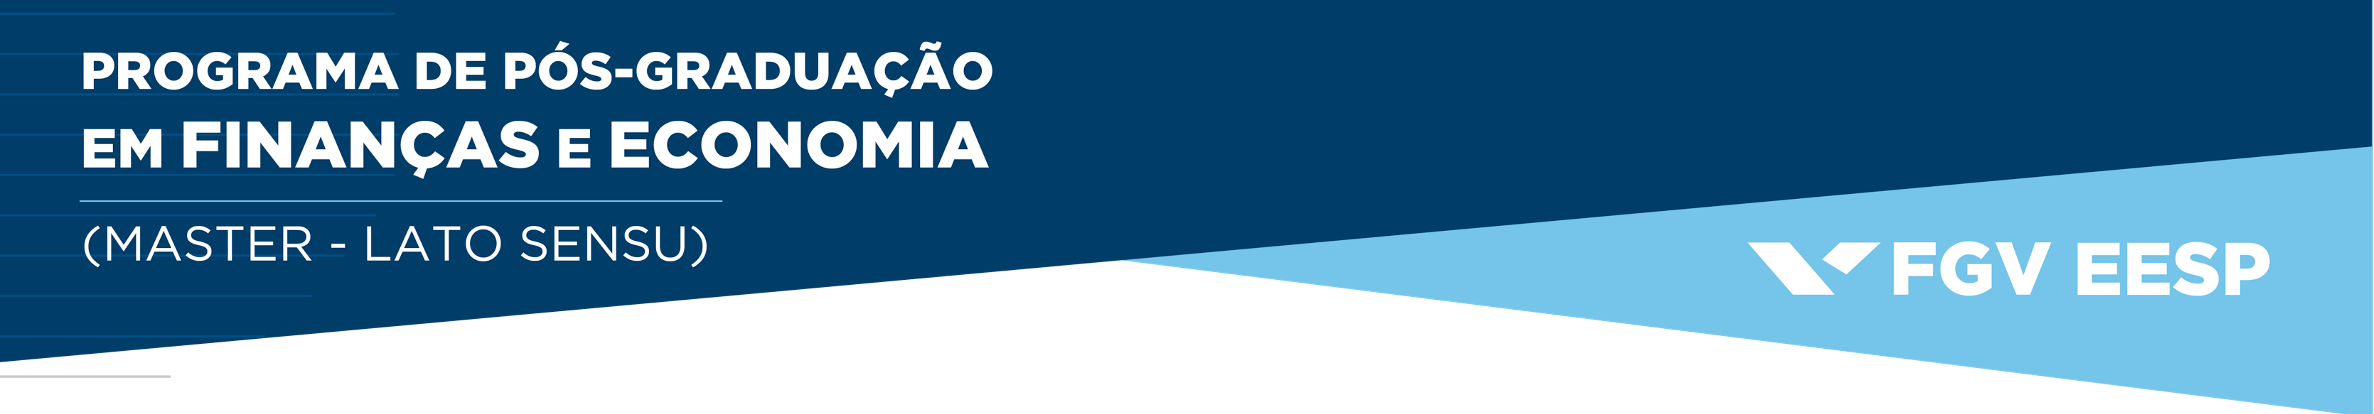

# Gráficos com Seaborn

## Índice <a name="topo"></a>

1. [Countplot - barras de frequência](#1)
2. [Catplot - perfís de médias](#2)
3. [Displot - histograma / distribuição](#3)
4. [Boxplot](#4)
5. [Scatterplot - Dispersão](#5)
6. [Jointplot - dispersão e histograma 2d](#6)
7. [Pairplot -  Matriz de dispersão](#7)
8. [Pairgrid - Matriz de dispersão](#8)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# %matplotlib notebook

In [4]:
penguins = sns.load_dataset("penguins")

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


In [5]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Plotagem com o Seaborn

O Seaborn tem funções que já fazem algons passos de tratamentos e sumarizações nos dados, e entregam gráficos mais sofisticados. Ainda pode ser necessário tratar rótulos de eixos, marcas de eixos, legendas títulos etc.

**Atenção:** Nem todos os objetos do Seaborn retornam ```AxesSubplots```. Alguns sim, para estes podem ser usados os mesmos métodos que já vimos do matplotlib. Caso contrário, devemos checar os métodos disponíveis para editar o gráfico.

### 1. Countplot - barras de frequência<a name="1"></a>
O Seaborn tem mais de uma função para gráficos de barras. Essas funções procuram trazer de uma forma prática um gráfico sofisticado executando sumarizações e opções de leiaute do gráfico automaticamente.

<div style="text-align: right" 
     
[Voltar ao índice](#topo)

#### Coutplot

O Countplot faz gráficos de barras onde a altura das barras são frequencias. Com ele não é necessário executar comandos para se obter as contagens. Essa função já calcula as contagens e apresenta algumas opções interessantes.

O ```contourplot()``` retorna um ```AxesSubplot``` - como o básico do matplotlib. Podem ser usados os mesmos métodos desse objeto. Ele tem realmente muitos recursos, vamos cobrir uma pequena parte, mas a [documentação](https://matplotlib.org/stable/api/axes_api.html) pode sempre ser referenciada.

<Axes: xlabel='day', ylabel='count'>

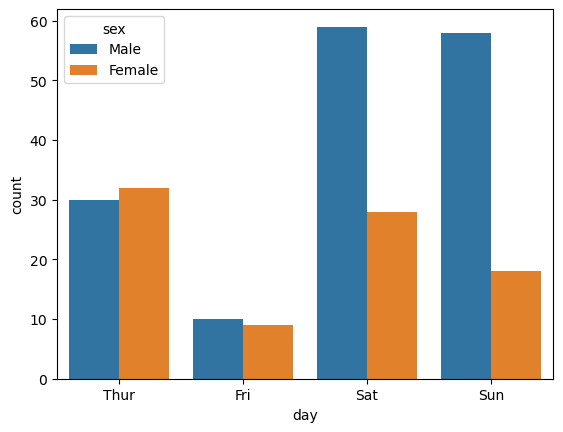

In [6]:
# O Seaborn já faz essa manipulação pra nós
sns.countplot(x='day', hue = 'sex', data=tips)

Tanto o seaborn quanto o pandas rodam matplotlib. Isso quer dizer que geral objetos do matplotlib que podem ser editados como tal.

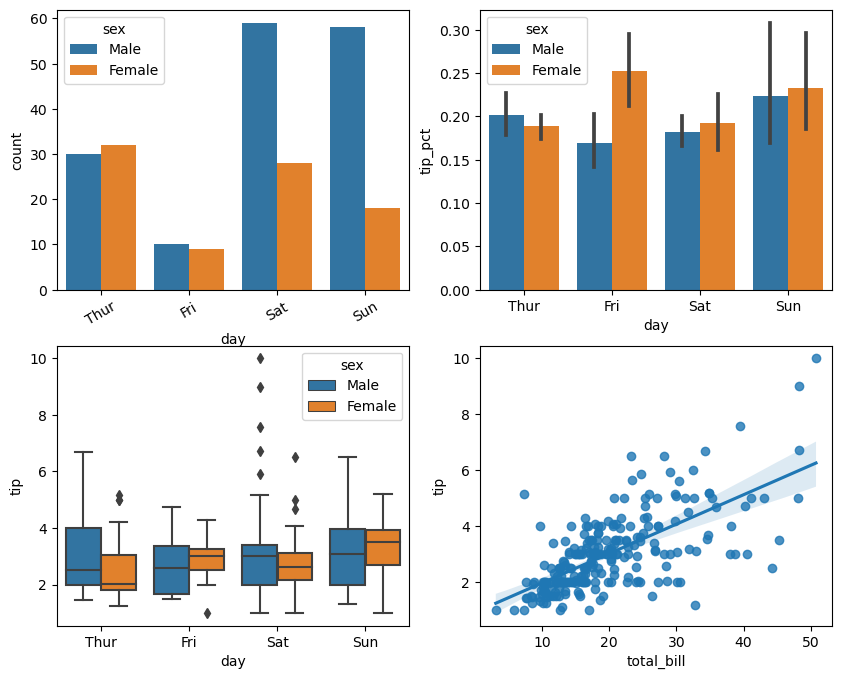

In [7]:
# Você pode também usar o barplot que traz a média da variável y por padrão
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0,0], x='day', hue = 'sex',data=tips)
sns.barplot(ax = axes[0, 1], x='day', y='tip_pct', hue = 'sex', data=tips)
sns.boxplot(ax = axes[1, 0], x='day', y='tip', hue = 'sex', data=tips)
sns.regplot(ax = axes[1, 1], x='total_bill', y='tip', data=tips)

# Podemos configurar normalmente os elementos dos gráficos
axes[0,0].tick_params(axis="x", rotation = 30)

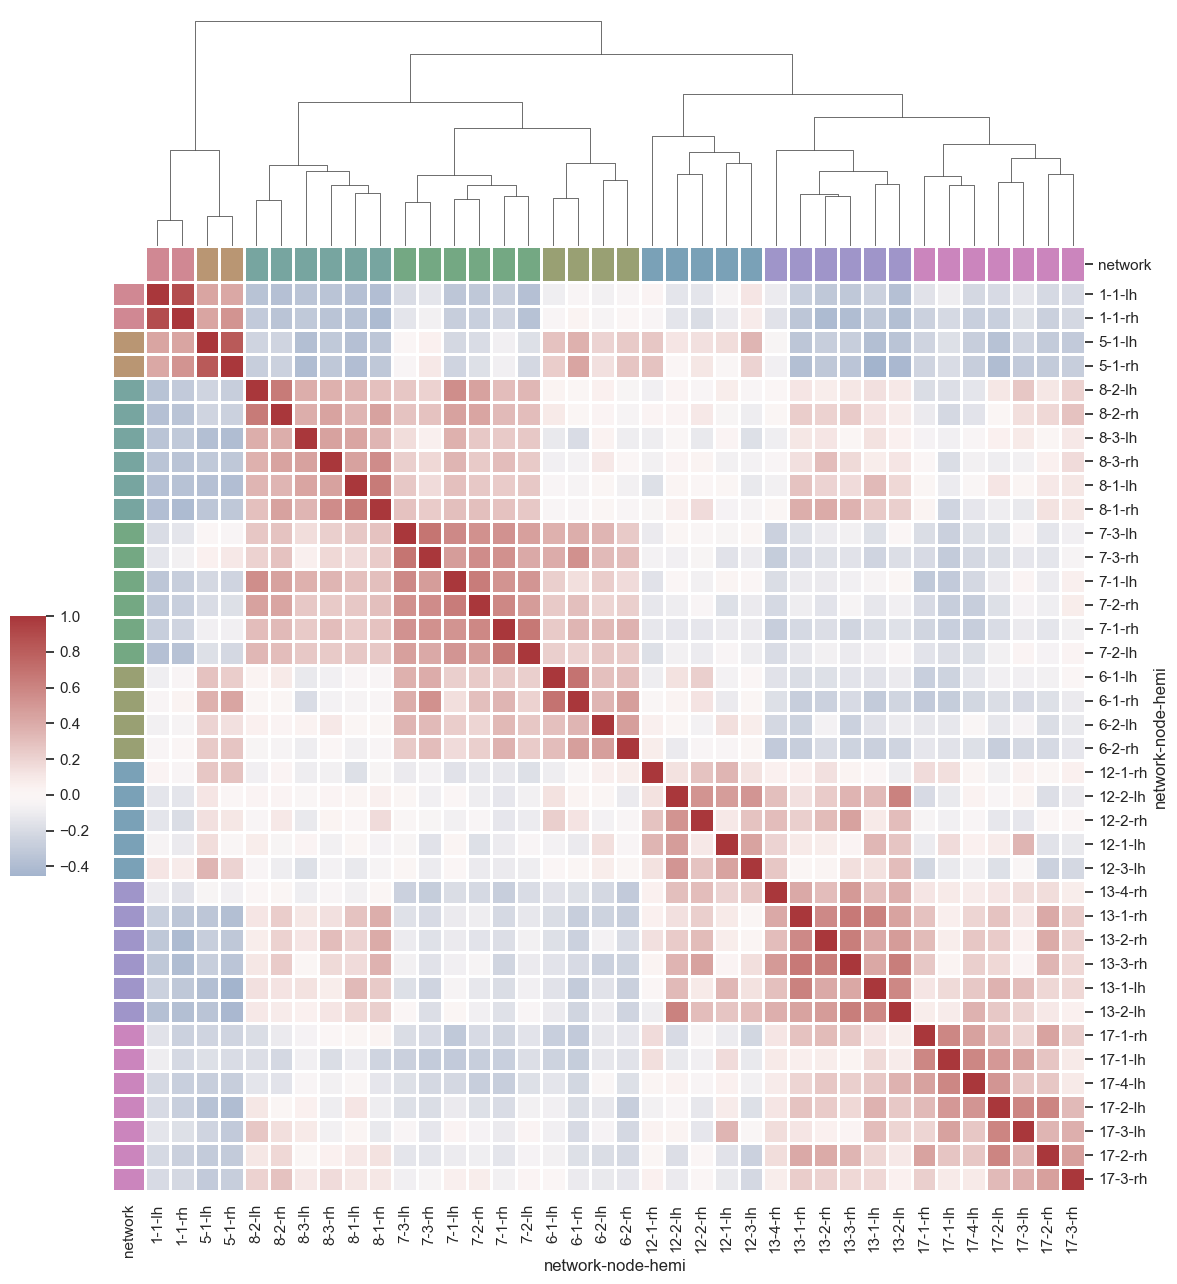

In [8]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

<Axes: xlabel='day', ylabel='count'>

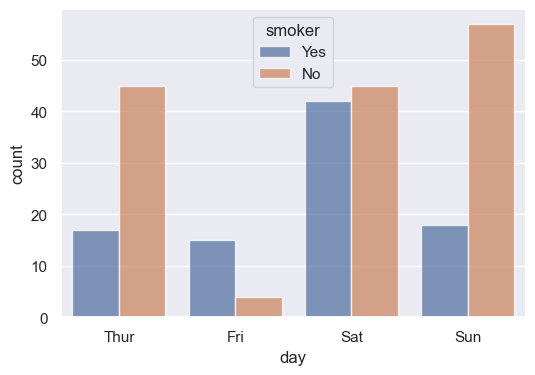

In [9]:
plt.rc('figure', figsize=(6, 4))

# A opção dodge = False não faz o mesmo que o "stacked = True" do pandas. 
#     essa opção simplesmente sobrepõe as barras.
sns.countplot(x='day'
              , hue = 'smoker'
              , data=tips[tips.tip_pct < 1]
#               , dodge=False
              , alpha = .75
             )


### 2. Catplot - perfís de médias<a name="2"></a>
O Catplot é o novo nome da função barplot. Essa função traz diversos recursos para realizar gráficos de barras dentre outros. 

Repare que o ```catplot()``` retorna um objeto diferente, do tipo ```FacetGrid```, que vai ter outros métodos associados (veja a [documentação do FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

Verifique a [documentação](https://seaborn.pydata.org/generated/seaborn.catplot.html).

<div style="text-align: right" 
     
[Voltar ao índice](#topo)



/var/folders/lt/jkc4vljs6_s2hq7_lhdsj_4c0000gp/T/ipykernel_12702/96769325.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  sns.catplot(x='day', y='total_bill'


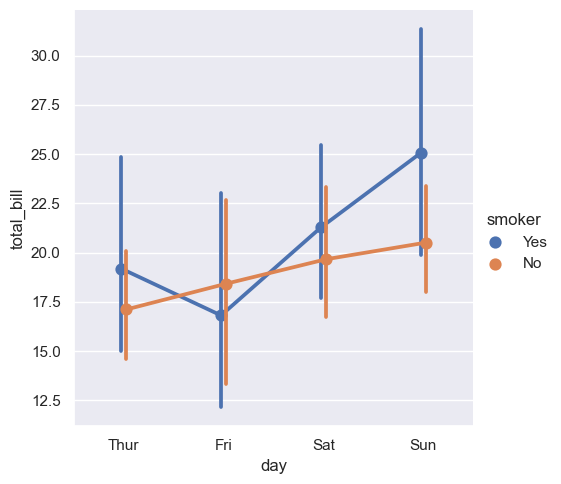

In [10]:
# Em que dia da semana fumantes consomem mais?
sns.catplot(x='day', y='total_bill'
            , hue = 'smoker'
            , kind='point' # "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count".
#             , estimator = np.sum
            , data=tips[tips.tip_pct < 1]
            , ci = 99
            , dodge = True
           )

#### Parâmetros ```col=```e ```row```.

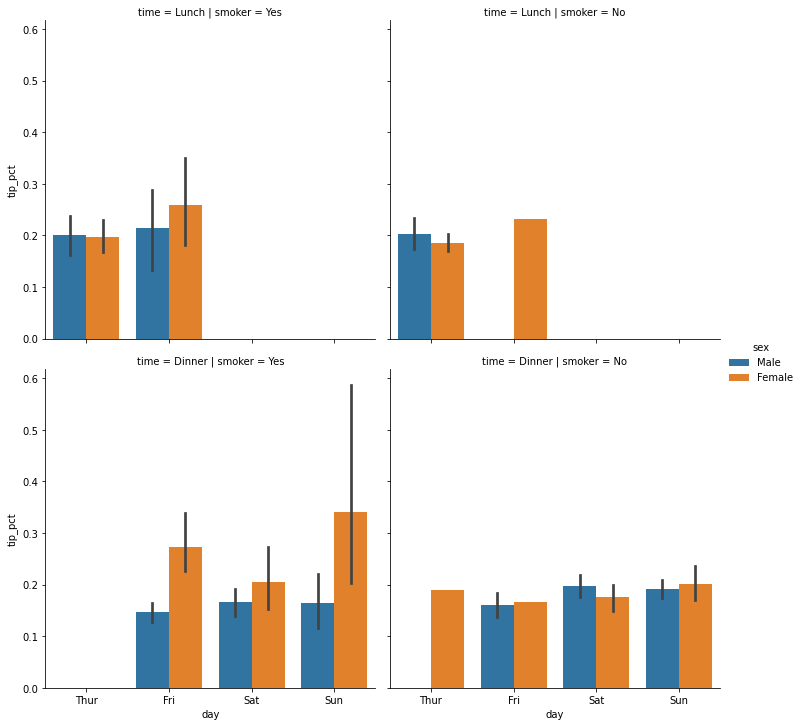

In [13]:
# Fazendo uma grade de gráficos 
sns.catplot(x='day', y='tip_pct'
            , row='time'
            , col='smoker'
            , hue = 'sex'
            , kind='bar'
            , data=tips[tips.tip_pct < 1]
           )

### 3. Displot - histograma / distribuição <a name="3"></a>
Você pode utilizar os métodos do Pandas, o matplotlib ou o Seaborn. Todos eles trabalham na base do matplotlib, mas o seaborn possui mais recursos para fornecer gráficos mais acabados.

Veja o catálogo do [displot](https://seaborn.pydata.org/generated/seaborn.displot.html).

<div style="text-align: right" 
     
[Voltar ao índice](#topo)

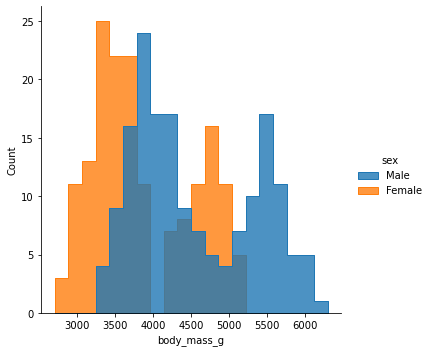

In [18]:
# histograma com covariáveis
sns.displot(data = penguins
            ,x = 'body_mass_g'
            ,hue = 'sex'
            ,bins = 20
            ,element = 'step'
            ,alpha = .8
           )

### 4. Boxplot <a name="4"></a>
É possível fazer boxplots através dos métodos do pandas, através do matplotlib, mas o seaborn fornece gráficos mais acabados.

Veja um catálogo dos recursos de boxplot do [seaborn ](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

<div style="text-align: right" 
     
[Voltar ao índice](#topo)

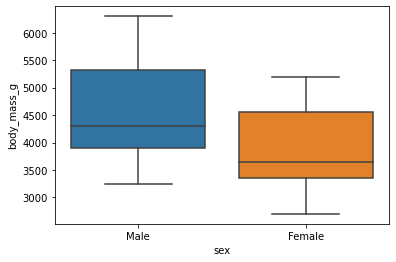

In [19]:
# usando o seaborn
ax = sns.boxplot(x="sex", y="body_mass_g", data=penguins)

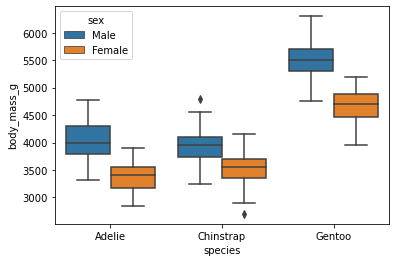

In [20]:
# usando o seaborn
ax = sns.boxplot(data = penguins, y="body_mass_g", x="species", orient="v", hue='sex')

### 5. Scatterplot - Dispersão <a name="5"></a>
O Seaborn tem diversos recursos para fazer um gráfico de dispersão com uma e diversas variáveis.
- Funçao [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), realiza gráficos de dispersão "simples".
- Função [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html), tem recursos mais diversificados que fornecem gráficos bem interessantes.
- Função [pairgrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) monta uma matriz de gráficos de dispersão com recursos interessantes para visualização da variabilidade dos dados.

<div style="text-align: right" 
     
[Voltar ao índice](#topo)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

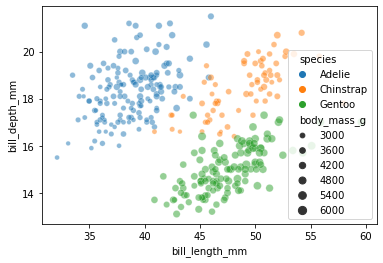

In [21]:
sns.scatterplot(x = 'bill_length_mm'
                , y = 'bill_depth_mm'
                , data = penguins
                , alpha = .5
                , hue = 'species'
                , size = 'body_mass_g'
               )

### 6. Jointplot - dispersão e histograma 2d <a name="6"></a>
O ```jointplot()``` é bem parecido com o ```scatterplot()```, mas tem opções de exibir o *kernell* da função (uma espécie de suavização do histograma) projetado nos eixos.
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

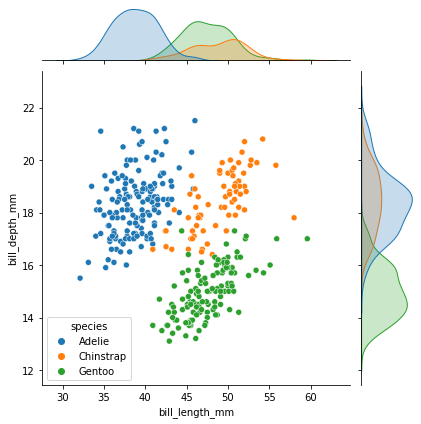

In [22]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue = 'species')

#### Histograma 2D
O jointplot tem também opções para exibir estimativas da densidade conjunta, como o "histograma 2D", que é uma excelente alternativa para visualizar relacionamento entre variáveis com muitos pontos. Veja o [catálogo](http://seaborn.pydata.org/generated/seaborn.jointplot.html).

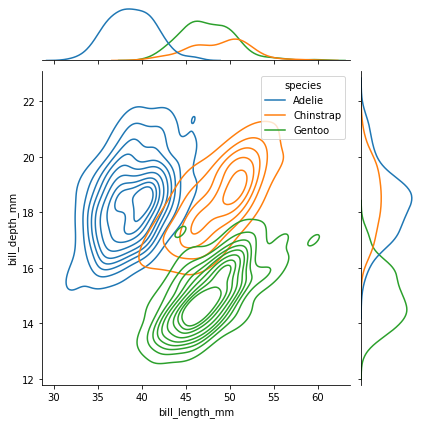

In [23]:
sns.jointplot(x = 'bill_length_mm'
              , y = 'bill_depth_mm'
              , data = penguins
              , hue = 'species'
              , kind="kde"   #{ "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
#               , bins = [15, 15] # parametro para usar com - kind = "hist"
             )

### Gráficos com muitos pontos
Quando temos muitos pontos, pode se tornar complicado encontrar padrões nesse tipo de gráfico. Algumas ideias são:

- Amostrar os dados
- Utilizar transparência (alpha menor que 1)
- Fazer o 'scatterplot 2D'

#### Histograma 2D

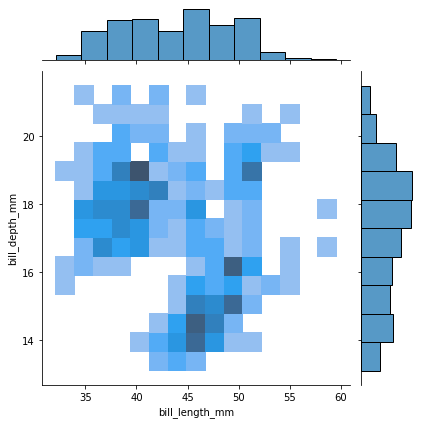

In [24]:
sns.jointplot(x = 'bill_length_mm'
              , y = 'bill_depth_mm'
              , data = penguins
              , kind="hist"
              , bins = [15, 15])

### 7. Pairplot -  Matriz de dispersão <a name="7"></a>
O ```pairplot()``` é feito para fazer uma "matriz de dispersão", ou seja, um mosaico com diversos gráficos de dispersão que pode ser muito útil para se identificar padrões multivariados entre variáveis contínuas. Também possui diversas opções. Na documentação há um [catálogo](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

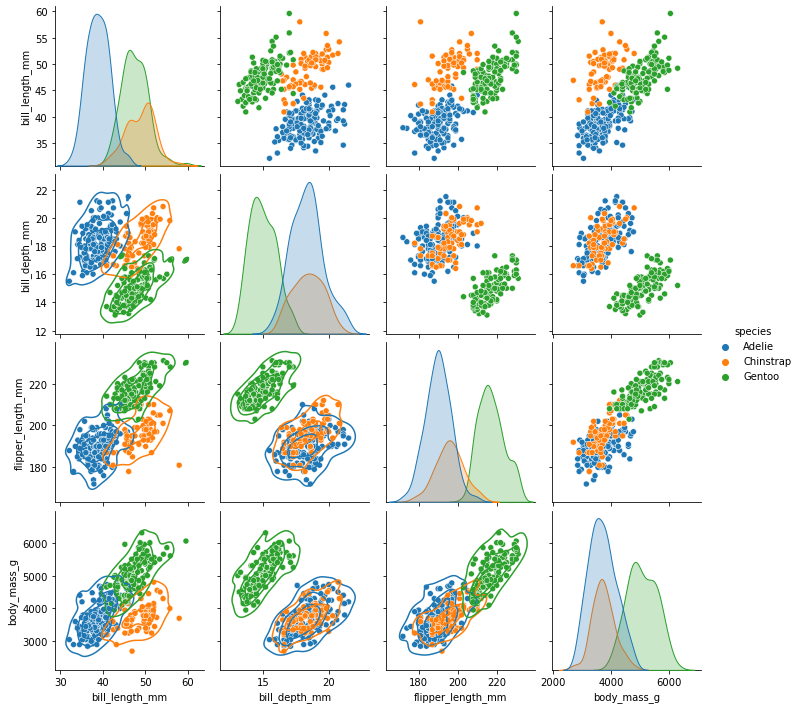

In [25]:
ax = sns.pairplot(penguins, hue='species')
ax.map_lower(sns.kdeplot, levels=4, color=".2")

### 8. Pairgrid - Matriz de dispersão <a name="8"></a>
O ```pairgrid()``` é parecido com o pairplot, porém tem maior versatilidade e os comandos podem ser um pouco mais complexos. A sintaxe lembra um pouco o *ggplot2* do R. você vai editando os elementos: diagonal, superior, inferior legenda etc, especificando as funções do seaborn.

[catálogo](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

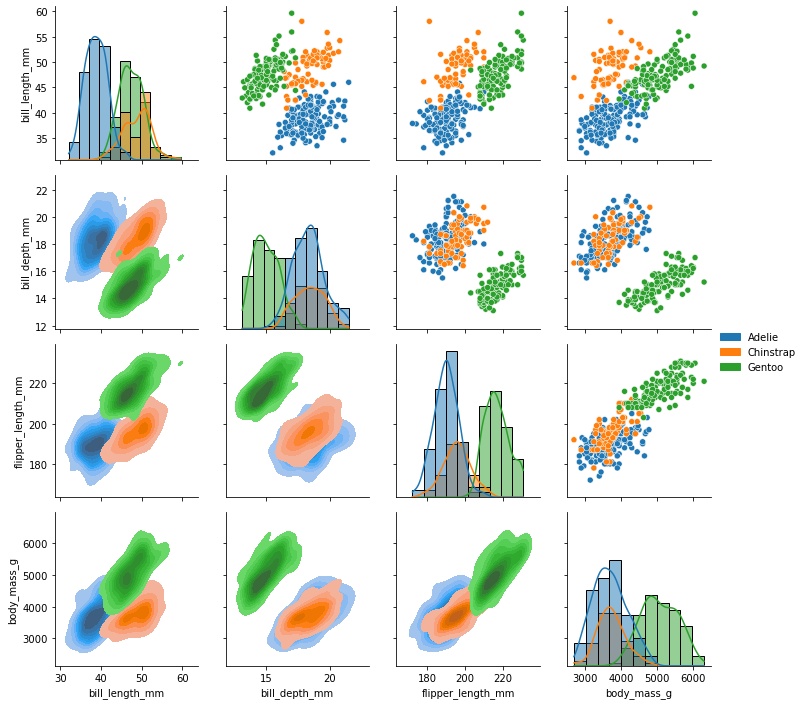

In [26]:
g = sns.PairGrid(penguins, hue='species')
# g.map_upper(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
g.add_legend(title="", adjust_subtitles=True)